<a href="https://colab.research.google.com/github/AbhishekMallaiah001/cs480student/blob/main/05/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

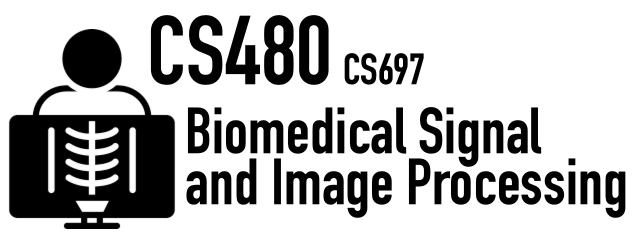
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [167]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 1.9MB 4.4MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: YOUR_ANSWER

There are 220 slices present.

In [4]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [9]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

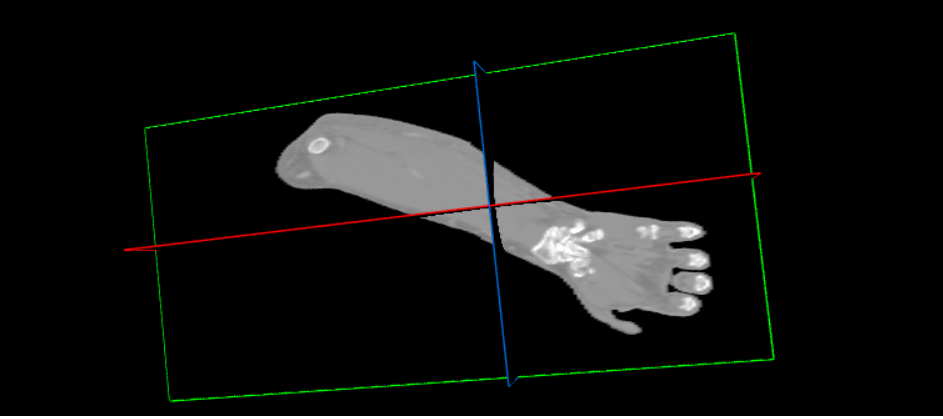

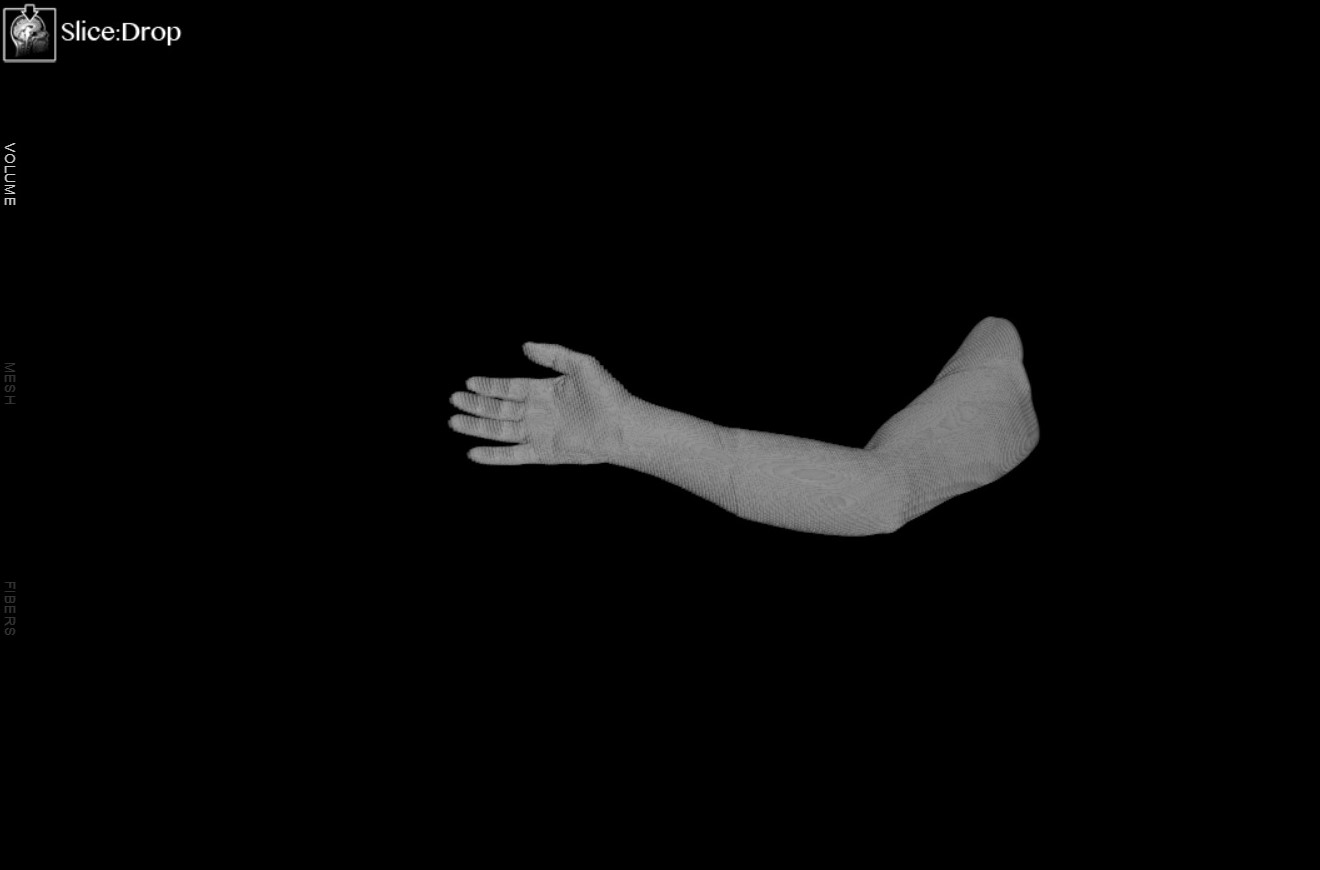

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [168]:
import zipfile

def fixBadZipfile(zipFile):  
 f = open(zipFile, 'r+b')  
 data = f.read()  
 pos = data.find(b'\x50\x4b\x05\x06') # End of central directory signature  
 if (pos > 0):    
     f.seek(pos + 22)   # size of 'ZIP end of central directory record' 
     f.truncate()  
     f.close()  
 else:  
     print("the file is truncated ")

zip = 'ct.zip'
fixBadZipfile (zip)

with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')


In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [169]:
# Referred a website to understand few logics

import pydicom
from pydicom import dcmread
import os

ct_files = os.listdir('ct')

slices = []
rejected = 0
numfiles = 0

for fname in list(ct_files):
    data_item = pydicom.dcmread(os.path.join("./ct/", fname))
    if hasattr(data_item, 'SliceLocation'):
       slices.append(data_item)
       numfiles += 1
    else:
       rejected += 1

slices = sorted(slices, key=lambda s: s.SliceLocation)

ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]





In [170]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY 

img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)


for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d


In [14]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

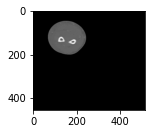

In [171]:
# TODO: YOUR CODE FOR AXIAL

a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2], cmap='gray')
a1.set_aspect(ax_aspect)

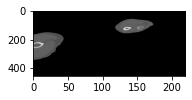

In [172]:
# TODO: YOUR CODE FOR SAGITTAL

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :], cmap='gray')
a2.set_aspect(sag_aspect)

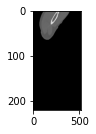

In [173]:
# TODO: YOUR CODE FOR CORONAL

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T, cmap='gray')
a3.set_aspect(cor_aspect)




**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [18]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

-175.0
235.0


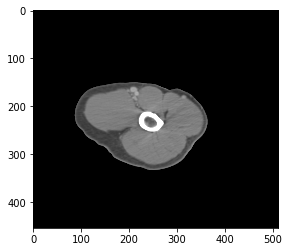

In [175]:
# TODO: YOUR CODE

slice_1 = slices[10]

window = slice_1.WindowWidth
level = slice_1.WindowCenter

# can be calculated as   "hu_pixels = slice_1.pixel_array * slice_1.RescaleSlope"
hu_pixels = slice_1.RescaleSlope*img3d[:,:,10]
rescale = slice_1.RescaleIntercept

vmin = level - window/2

vmax = level + window/2

print(vmin)
print(vmax)
plt.imshow(hu_pixels + rescale,cmap='gray', vmin=(vmin - 100), vmax=(vmax+150))
plt.show()

In [20]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [ ]:
# TODO: YOUR CODE

In [ ]:
# Which values make sense and why? 

Low_value = -275 and high_value = +385

window value between -275 to 385 display the clear image, there is a clear bifurcation of tssues, Bones, air etc.

In [ ]:
# TODO: YOUR ANSWER

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [21]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

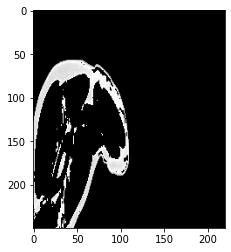

In [177]:
# TODO: YOUR CODE TO SEGMENT FAT

new_mask = (img3d.copy()).astype(int16)
new_mask[(new_mask  < -100)] = 0
new_mask[new_mask > 1050] = 0


plt.imshow(new_mask[200, :250, :400], cmap='gray')

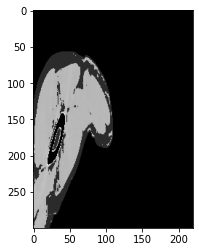

In [182]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
#soft tissue between +40 to +80

new_mask_1 = (img3d.copy()).astype(int16)
new_mask_1 [new_mask > 30] = 255
new_mask_1[new_mask_1  < 30  ] = 0
new_mask_1[new_mask_1 > 1500] = 0

plt.imshow(new_mask_1[200, :300, :400], cmap='gray')

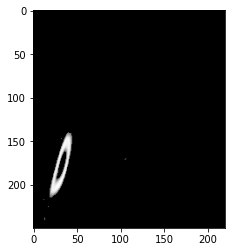

In [179]:
# TODO: YOUR CODE TO SEGMENT BONES


new_mask_2 = (img3d.copy()).astype(int16)
new_mask_2[new_mask_2  < 1150 ] = 0

plt.imshow(new_mask_2[200, :250, :450], cmap='gray')

In [ ]:
# Are the segmentations good?

The segmentation looks good. clear exhibition of the bones, fat and soft tissues. May be other methods can make even better.

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""